In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
from torchsummary import summary
import time

# 0 Preparation

### 0.1 Prepare Dataset

In [14]:
# Set the random seed for reproducible results
torch.manual_seed(0)

data_dir = 'Dataset'
# With these commands the train and test datasets, respectively, are downloaded
# automatically and stored in the local "data_dir" directory
train_dataset = torchvision.datasets.CIFAR10(data_dir, train=True, download=True)
test_dataset  = torchvision.datasets.CIFAR10(data_dir, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[1, 1, 1])
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[1, 1, 1])
])

# Set the train transform
train_dataset.transform = train_transform
# Set the test transform
test_dataset.transform = test_transform

### 0.2 Define CNNs

#### 0.2.1 Default CNN

In [16]:
class default_CNN(nn.Module):
    
    def __init__(self, encoded_space_dim, fc2_input_dim):
        super().__init__()
        
        ### Convolutional section
        self.cnn = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(3, 24, 5, stride=1, padding='valid'),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            # Second convolutional layer
            nn.Conv2d(24, 48, 3, stride=1, padding='valid'),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            # Third convolutional layer
            nn.Conv2d(48, 96, 3, stride=1, padding='valid'),
            nn.MaxPool2d(2, stride=2)
        )
        
        ### Flatten layer
        self.flatten = nn.Flatten(start_dim=1)

        ### Linear section
        self.lin = nn.Sequential(
            # First linear layer
            nn.Linear(2 * 2 * 96, fc2_input_dim),
            nn.ReLU(),
            # Second linear layer
            nn.Linear(fc2_input_dim, encoded_space_dim)
        )
        
    def forward(self, x):
        # Apply convolutions
        x = self.cnn(x)
        # Flatten
        x = self.flatten(x)
        # Apply linear layers
        x = self.lin(x)
        return x

#### 0.2.2 Number of filters

In [17]:
class CNN_filter_num(nn.Module):
    
    def __init__(self, encoded_space_dim, fc2_input_dim):
        super().__init__()
        
        ### Convolutional section
        self.cnn = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(3, 64, 5, stride=1, padding='valid'),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            # Second convolutional layer
            nn.Conv2d(64, 128, 3, stride=1, padding='valid'),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            # Third convolutional layer
            nn.Conv2d(128, 256, 3, stride=1, padding='valid'),
            nn.MaxPool2d(2, stride=2)
        )
        
        ### Flatten layer
        self.flatten = nn.Flatten(start_dim=1)

        ### Linear section
        self.lin = nn.Sequential(
            # First linear layer
            nn.Linear(2 * 2 * 256, fc2_input_dim),
            nn.ReLU(),
            # Second linear layer
            nn.Linear(fc2_input_dim, encoded_space_dim)
        )
        
    def forward(self, x):
        # Apply convolutions
        x = self.cnn(x)
        # Flatten
        x = self.flatten(x)
        # Apply linear layers
        x = self.lin(x)
        return x

#### 0.2.3 Number of Layers

In [18]:
class CNN_layers(nn.Module):
    
    def __init__(self, encoded_space_dim, fc2_input_dim):
        super().__init__()
        
        ### Convolutional section
        self.cnn = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(3, 24, 5, stride=1, padding='valid'),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            # Second convolutional layer
            nn.Conv2d(24, 48, 3, stride=1, padding='valid'),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            # Third convolutional layer
            nn.Conv2d(48, 96, 3, stride=1, padding='valid'),
            nn.MaxPool2d(2, stride=2)
        )
        
        ### Flatten layer
        self.flatten = nn.Flatten(start_dim=1)

        ### Linear section
        self.lin = nn.Sequential(
            # First linear layer
            nn.Linear(2 * 2 * 96, fc2_input_dim),
            nn.ReLU(),
            # Inserted second linear layer
            nn.Linear(fc2_input_dim, 128),
            nn.ReLU(),
            # Third linear layer
            nn.Linear(128, encoded_space_dim)
        )
        
    def forward(self, x):
        # Apply convolutions
        x = self.cnn(x)
        # Flatten
        x = self.flatten(x)
        # Apply linear layers
        x = self.lin(x)
        return x

#### 0.2.4 Filter Size

In [19]:
class CNN_filter_size(nn.Module):
    
    def __init__(self, encoded_space_dim, fc2_input_dim):
        super().__init__()
        
        ### Convolutional section
        self.cnn = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(3, 64, 7, stride=1, padding='valid'),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            # Second convolutional layer
            nn.Conv2d(64, 128, 5, stride=1, padding='valid'),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            # Third convolutional layer
            nn.Conv2d(128, 256, 3, stride=1, padding='valid'),
            nn.MaxPool2d(2, stride=2)
        )
        
        ### Flatten layer
        self.flatten = nn.Flatten(start_dim=1)

        ### Linear section
        self.lin = nn.Sequential(
            # First linear layer
            nn.Linear(1 * 1 * 256, fc2_input_dim),
            nn.ReLU(),
            # Second linear layer
            nn.Linear(fc2_input_dim, encoded_space_dim)
        )
        
    def forward(self, x):
        # Apply convolutions
        x = self.cnn(x)
        # Flatten
        x = self.flatten(x)
        # Apply linear layers
        x = self.lin(x)
        return x

#### 0.2.5 Leaky ReLu

In [20]:
class CNN_leaky(nn.Module):
    
    def __init__(self, encoded_space_dim, fc2_input_dim):
        super().__init__()
        
        ### Convolutional section
        self.cnn = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(3, 64, 5, stride=1, padding='valid'),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, stride=2),
            # Second convolutional layer
            nn.Conv2d(64, 128, 3, stride=1, padding='valid'),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, stride=2),
            # Third convolutional layer
            nn.Conv2d(128, 256, 3, stride=1, padding='valid'),
            nn.MaxPool2d(2, stride=2)
        )
        
        ### Flatten layer
        self.flatten = nn.Flatten(start_dim=1)

        ### Linear section
        self.lin = nn.Sequential(
            # First linear layer
            nn.Linear(2 * 2 * 256, fc2_input_dim),
            nn.LeakyReLU(),
            # Second linear layer
            nn.Linear(fc2_input_dim, encoded_space_dim)
        )
        
    def forward(self, x):
        # Apply convolutions
        x = self.cnn(x)
        # Flatten
        x = self.flatten(x)
        # Apply linear layers
        x = self.lin(x)
        return x

#### 0.2.6 Dropout

In [21]:
class CNN_dropout(nn.Module):
    
    def __init__(self, encoded_space_dim, fc2_input_dim):
        super().__init__()
        
        ### Convolutional section
        self.cnn = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(3, 64, 5, stride=1, padding='valid'),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, stride=2),
            # Second convolutional layer
            nn.Conv2d(64, 128, 3, stride=1, padding='valid'),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, stride=2),
            # Third convolutional layer
            nn.Conv2d(128, 256, 3, stride=1, padding='valid'),
            nn.MaxPool2d(2, stride=2)
        )
        
        ### Flatten layer
        self.flatten = nn.Flatten(start_dim=1)

        ### Linear section
        self.lin = nn.Sequential(
            # First linear layer
            nn.Linear(2 * 2 * 256, fc2_input_dim),
            nn.LeakyReLU(),
            # Dropout Regulation
            nn.Dropout(p=0.3),
            # Second linear layer
            nn.Linear(fc2_input_dim, encoded_space_dim)
        )
        
    def forward(self, x):
        # Apply convolutions
        x = self.cnn(x)
        # Flatten
        x = self.flatten(x)
        # Apply linear layers
        x = self.lin(x)
        return x

#### 0.2.7 Batch Normalization Layer

In [22]:
class CNN_batchnorm(nn.Module):
    
    def __init__(self, encoded_space_dim, fc2_input_dim):
        super().__init__()
        
        ### Convolutional section
        self.cnn = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(3, 64, 5, stride=1, padding='valid'),
            nn.LeakyReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, stride=2),
            # Second convolutional layer
            nn.Conv2d(64, 128, 3, stride=1, padding='valid'),
            nn.LeakyReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, stride=2),
            # Third convolutional layer
            nn.Conv2d(128, 256, 3, stride=1, padding='valid'),
            nn.MaxPool2d(2, stride=2)
        )
        
        ### Flatten layer
        self.flatten = nn.Flatten(start_dim=1)

        ### Linear section
        self.lin = nn.Sequential(
            # First linear layer
            nn.Linear(2 * 2 * 256, fc2_input_dim),
            nn.LeakyReLU(),
            nn.BatchNorm1d(fc2_input_dim),
            # Dropout Regulation
            nn.Dropout(p=0.3),
            # Second linear layer
            nn.Linear(fc2_input_dim, encoded_space_dim)
        )
        
    def forward(self, x):
        # Apply convolutions
        x = self.cnn(x)
        # Flatten
        x = self.flatten(x)
        # Apply linear layers
        x = self.lin(x)
        return x

### 0.3 Define Training and Testing Functions

In [23]:
### Training function
def train_cnn(model, device, dataloader, optimizer):
    # Set train mode for CNN
    model.train()
    train_loss = []

    # Iterate the dataloader (we need the label values, this is supervised learning)
    for image_batch, labels in dataloader:
        # Move tensor to the proper device
        image_batch = image_batch.to(device)
        labels = labels.to(device)
        # Apply CNN to predict
        predictions = model(image_batch)

        # Evaluate loss with Cross Entropy Loss
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(predictions, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.detach().cpu().numpy())

    return np.mean(train_loss)

In [24]:
### Testing function
def test_cnn(model, device, dataloader):
    # Set evaluation mode for CNN
    model.eval()
    with torch.no_grad(): # No need to track the gradients
        # Define the lists to store the outputs for each batch
        conc_out = []
        conc_label = []
        for image_batch, labels in dataloader:
            # Move tensor to the proper device
            image_batch = image_batch.to(device)
            labels = labels.to(device)
            # Apply model to calculate the probability of each class
            prob = model(image_batch)
            # Append the output probabilities and the original label to the lists
            conc_out.append(prob.cpu())
            conc_label.append(labels.cpu())
        # Create a single tensor with all the values in the lists
        conc_out = torch.cat(conc_out)
        conc_label = torch.cat(conc_label)
        # Classify (predict) based on the highest probability
        pre = torch.argmax(conc_out, dim=1)
        # Calculate recall rate
        recall_rate = torch.sum(conc_label == pre) / len(pre)
        recall_rate = recall_rate.detach().cpu().numpy()
    return recall_rate

# 1 Default CNN and Training
##### Learning rate: 0.001
##### Size of minibatch: 64
##### Training epochs: 300
##### Data Shuffling: False

In [ ]:
# Initialize CNN
default_cnn = default_CNN(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
default_cnn.to(device)

print(f'Selected device: {device}')
summary(default_cnn, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 28, 28]           1,824
              ReLU-2           [-1, 24, 28, 28]               0
         MaxPool2d-3           [-1, 24, 14, 14]               0
            Conv2d-4           [-1, 48, 12, 12]          10,416
              ReLU-5           [-1, 48, 12, 12]               0
         MaxPool2d-6             [-1, 48, 6, 6]               0
            Conv2d-7             [-1, 96, 4, 4]          41,568
         MaxPool2d-8             [-1, 96, 2, 2]               0
           Flatten-9                  [-1, 384]               0
           Linear-10                  [-1, 512]         197,120
             ReLU-11                  [-1, 512]               0
           Linear-12                   [-1, 10]           5,130
Total params: 256,058
Trainable params: 256,058
Non-trainable params: 0
---------

In [ ]:
# Define the learning rate, batch size, and training epochs
lr= 0.001
batch_size = 64
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(default_cnn.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
### Training cycle
### Time: 1h 1m 75s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=default_cnn, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/models_pro3/default/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(default_cnn, name)
        np.save('/content/drive/My Drive/models_pro3/default/train_loss.npy', np.array(loss))

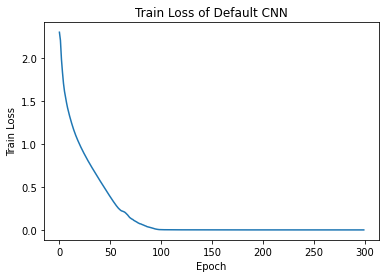

Recall rate of default CNN:  0.6932


In [ ]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/models_pro3/default/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of Default CNN')
plt.show()

# Test
default_cnn = torch.load('/content/drive/My Drive/models_pro3/default/cnn_epc300_1011_11_10_33.pth')
recall_rate = test_cnn(model=default_cnn, device=device, dataloader=test_loader)
print('Recall rate of default CNN: ', recall_rate)

# 2 Network Structure

### 2.1 Number of layers vs. Number of filters

#### 2.1.1 Modify number of filters of 3 convolutional layers
##### from [24, 48, 96] to [64, 128, 256]

In [ ]:
# Initialize CNN
cnn_filter_num = CNN_filter_num(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cnn_filter_num.to(device)

print(f'Selected device: {device}')
summary(cnn_filter_num, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           4,864
              ReLU-2           [-1, 64, 28, 28]               0
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 12, 12]          73,856
              ReLU-5          [-1, 128, 12, 12]               0
         MaxPool2d-6            [-1, 128, 6, 6]               0
            Conv2d-7            [-1, 256, 4, 4]         295,168
         MaxPool2d-8            [-1, 256, 2, 2]               0
           Flatten-9                 [-1, 1024]               0
           Linear-10                  [-1, 512]         524,800
             ReLU-11                  [-1, 512]               0
           Linear-12                   [-1, 10]           5,130
Total params: 903,818
Trainable params: 903,818
Non-trainable params: 0
---------

In [ ]:
# Define the learning rate, batch size, and training epochs
lr= 0.001
batch_size = 64
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(cnn_filter_num.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
### Training cycle
### Time: 1h 13m 13s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=cnn_filter_num, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/filter_num/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(cnn_filter_num, name)
        np.save('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/filter_num/train_loss.npy', np.array(loss))

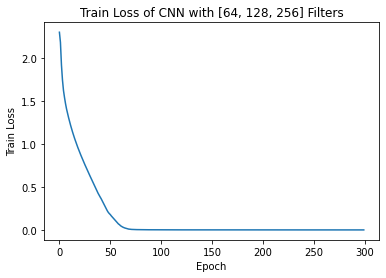

Recall rate of CNN with [64, 128, 256] filters:  0.7146


In [ ]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/filter_num/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of CNN with [64, 128, 256] Filters')
plt.show()

# Test
cnn_filter_num = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/filter_num/cnn_epc300_1011_11_27_57.pth')
recall_rate = test_cnn(model=cnn_filter_num, device=device, dataloader=test_loader)
print('Recall rate of CNN with [64, 128, 256] filters: ', recall_rate)

#### 2.1.2 Add a fully connected layer between original two fully connected layers
##### output units 128, followed by a ReLu

In [ ]:
# Initialize CNN
cnn_layers = CNN_layers(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cnn_layers.to(device)

print(f'Selected device: {device}')
summary(cnn_layers, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 28, 28]           1,824
              ReLU-2           [-1, 24, 28, 28]               0
         MaxPool2d-3           [-1, 24, 14, 14]               0
            Conv2d-4           [-1, 48, 12, 12]          10,416
              ReLU-5           [-1, 48, 12, 12]               0
         MaxPool2d-6             [-1, 48, 6, 6]               0
            Conv2d-7             [-1, 96, 4, 4]          41,568
         MaxPool2d-8             [-1, 96, 2, 2]               0
           Flatten-9                  [-1, 384]               0
           Linear-10                  [-1, 512]         197,120
             ReLU-11                  [-1, 512]               0
           Linear-12                  [-1, 128]          65,664
             ReLU-13                  [-1, 128]               0
           Linear

In [ ]:
# Define the learning rate, batch size, and training epochs
lr= 0.001
batch_size = 64
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(cnn_layers.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
### Training cycle
### Time: 1h 6m 2s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=cnn_layers, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/layer_num/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(cnn_layers, name)
        np.save('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/layer_num/train_loss.npy', np.array(loss))

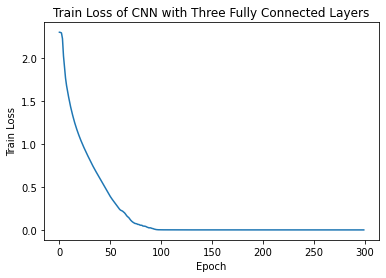

Recall rate of CNN with three fully connected layers:  0.7018


In [ ]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/layer_num/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of CNN with Three Fully Connected Layers')
plt.show()

# Test
cnn_layers = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/layer_num/cnn_epc300_1011_12_52_44.pth')
recall_rate = test_cnn(model=cnn_layers, device=device, dataloader=test_loader)
print('Recall rate of CNN with three fully connected layers: ', recall_rate)

### 2.2 Filter Size
##### change filters size of convolutional layer 1 and 2:
##### from 5$\times$5, 3$\times$3 to 7$\times$7, 5$\times$5

In [ ]:
# Initialize CNN
cnn_filter_size = CNN_filter_size(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cnn_filter_size.to(device)

print(f'Selected device: {device}')
summary(cnn_filter_size, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]           9,472
              ReLU-2           [-1, 64, 26, 26]               0
         MaxPool2d-3           [-1, 64, 13, 13]               0
            Conv2d-4            [-1, 128, 9, 9]         204,928
              ReLU-5            [-1, 128, 9, 9]               0
         MaxPool2d-6            [-1, 128, 4, 4]               0
            Conv2d-7            [-1, 256, 2, 2]         295,168
         MaxPool2d-8            [-1, 256, 1, 1]               0
           Flatten-9                  [-1, 256]               0
           Linear-10                  [-1, 512]         131,584
             ReLU-11                  [-1, 512]               0
           Linear-12                   [-1, 10]           5,130
Total params: 646,282
Trainable params: 646,282
Non-trainable params: 0
---------

In [ ]:
# Define the learning rate, batch size, and training epochs
lr= 0.001
batch_size = 64
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(cnn_filter_size.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
### Training cycle
### Time: 1h 6m 2s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=cnn_filter_size, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/filter_size/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(cnn_filter_size, name)
        np.save('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/filter_size/train_loss.npy', np.array(loss))

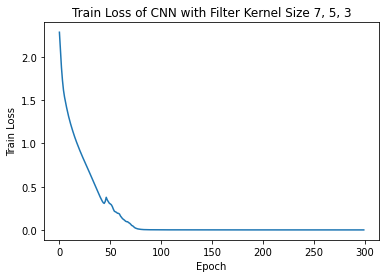

Recall rate of CNN with filter kernel size 7, 5, 3:  0.7003


In [ ]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/filter_size/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of CNN with Filter Kernel Size 7, 5, 3')
plt.show()

# Test
cnn_filter_size = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/filter_size/cnn_epc300_1012_12_22_17.pth')
recall_rate = test_cnn(model=cnn_filter_size, device=device, dataloader=test_loader)
print('Recall rate of CNN with filter kernel size 7, 5, 3: ', recall_rate)

### 2.3 ReLu vs. Leaky ReLu
##### change all activation functions to Leaky ReLu

In [ ]:
# Initialize CNN
cnn_leaky = CNN_leaky(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cnn_leaky.to(device)

print(f'Selected device: {device}')
summary(cnn_leaky, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           4,864
         LeakyReLU-2           [-1, 64, 28, 28]               0
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 12, 12]          73,856
         LeakyReLU-5          [-1, 128, 12, 12]               0
         MaxPool2d-6            [-1, 128, 6, 6]               0
            Conv2d-7            [-1, 256, 4, 4]         295,168
         MaxPool2d-8            [-1, 256, 2, 2]               0
           Flatten-9                 [-1, 1024]               0
           Linear-10                  [-1, 512]         524,800
        LeakyReLU-11                  [-1, 512]               0
           Linear-12                   [-1, 10]           5,130
Total params: 903,818
Trainable params: 903,818
Non-trainable params: 0
---------

In [ ]:
# Define the learning rate, batch size, and training epochs
lr= 0.001
batch_size = 64
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(cnn_leaky.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
### Training cycle
### Time: 1h 10m 55s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=cnn_leaky, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/leaky/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(cnn_leaky, name)
        np.save('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/leaky/train_loss.npy', np.array(loss))

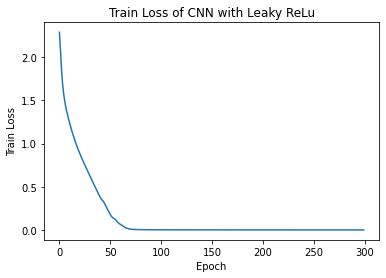

Recall rate of CNN with Leaky ReLu:  0.7199


In [ ]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/leaky/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of CNN with Leaky ReLu')
plt.show()

# Test
cnn_leaky = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/leaky/cnn_epc300_1012_22_43_08.pth')
recall_rate = test_cnn(model=cnn_leaky, device=device, dataloader=test_loader)
print('Recall rate of CNN with Leaky ReLu: ', recall_rate)

### 2.4 Dropout vs. without Dropout
##### add a dropout regulation between fully connected layer 1 and 2
##### dropout rate = 0.3

In [ ]:
# Initialize CNN
cnn_dropout = CNN_dropout(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cnn_dropout.to(device)

print(f'Selected device: {device}')
summary(cnn_dropout, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           4,864
         LeakyReLU-2           [-1, 64, 28, 28]               0
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 12, 12]          73,856
         LeakyReLU-5          [-1, 128, 12, 12]               0
         MaxPool2d-6            [-1, 128, 6, 6]               0
            Conv2d-7            [-1, 256, 4, 4]         295,168
         MaxPool2d-8            [-1, 256, 2, 2]               0
           Flatten-9                 [-1, 1024]               0
           Linear-10                  [-1, 512]         524,800
        LeakyReLU-11                  [-1, 512]               0
          Dropout-12                  [-1, 512]               0
           Linear-13                   [-1, 10]           5,130
Total params: 903

In [ ]:
# Define the learning rate, batch size, and training epochs
lr= 0.001
batch_size = 64
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(cnn_dropout.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
### Training cycle
### Time: 1h 14m 43s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=cnn_dropout, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/dropout/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(cnn_dropout, name)
        np.save('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/dropout/train_loss.npy', np.array(loss))

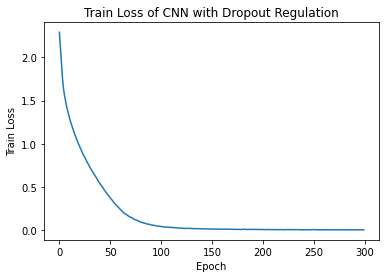

Recall rate of CNN with dropout regulation:  0.7358


In [ ]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/dropout/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of CNN with Dropout Regulation')
plt.show()

# Test
cnn_dropout = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/dropout/cnn_epc300_1013_13_22_14.pth')
recall_rate = test_cnn(model=cnn_dropout, device=device, dataloader=test_loader)
print('Recall rate of CNN with dropout regulation: ', recall_rate)

### 2.5 Batch Normalization Layer
##### add batch normalization layer after each activation function

In [ ]:
# Initialize CNN
cnn_batchnorm = CNN_batchnorm(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cnn_batchnorm.to(device)

print(f'Selected device: {device}')
summary(cnn_batchnorm, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           4,864
         LeakyReLU-2           [-1, 64, 28, 28]               0
       BatchNorm2d-3           [-1, 64, 28, 28]             128
         MaxPool2d-4           [-1, 64, 14, 14]               0
            Conv2d-5          [-1, 128, 12, 12]          73,856
         LeakyReLU-6          [-1, 128, 12, 12]               0
       BatchNorm2d-7          [-1, 128, 12, 12]             256
         MaxPool2d-8            [-1, 128, 6, 6]               0
            Conv2d-9            [-1, 256, 4, 4]         295,168
        MaxPool2d-10            [-1, 256, 2, 2]               0
          Flatten-11                 [-1, 1024]               0
           Linear-12                  [-1, 512]         524,800
        LeakyReLU-13                  [-1, 512]               0
      BatchNorm1d

In [ ]:
# Define the learning rate, batch size, and training epochs
lr= 0.001
batch_size = 64
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(cnn_batchnorm.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
### Training cycle
### Time: 1h 15m 44s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=cnn_batchnorm, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/batchnorm/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(cnn_batchnorm, name)
        np.save('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/batchnorm/train_loss.npy', np.array(loss))

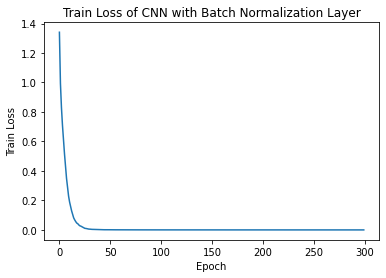

Recall rate of CNN with batch normalization layer:  0.7487
time: 2.44 s (started: 2022-10-14 14:21:48 +00:00)


In [ ]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/batchnorm/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of CNN with Batch Normalization Layer')
plt.show()

# Test
cnn_batchnorm = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/batchnorm/cnn_epc300_1014_13_49_01.pth')
recall_rate = test_cnn(model=cnn_batchnorm, device=device, dataloader=test_loader)
print('Recall rate of CNN with batch normalization layer: ', recall_rate)

# 3 Training Settings

### 3.1 Batch Size
##### change batch size from 64 to 256

In [ ]:
# Initialize CNN
cnn_batchnorm = CNN_batchnorm(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cnn_batchnorm.to(device)

print(f'Selected device: {device}')
summary(cnn_batchnorm, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           4,864
         LeakyReLU-2           [-1, 64, 28, 28]               0
       BatchNorm2d-3           [-1, 64, 28, 28]             128
         MaxPool2d-4           [-1, 64, 14, 14]               0
            Conv2d-5          [-1, 128, 12, 12]          73,856
         LeakyReLU-6          [-1, 128, 12, 12]               0
       BatchNorm2d-7          [-1, 128, 12, 12]             256
         MaxPool2d-8            [-1, 128, 6, 6]               0
            Conv2d-9            [-1, 256, 4, 4]         295,168
        MaxPool2d-10            [-1, 256, 2, 2]               0
          Flatten-11                 [-1, 1024]               0
           Linear-12                  [-1, 512]         524,800
        LeakyReLU-13                  [-1, 512]               0
      BatchNorm1d

In [ ]:
# Define the learning rate, batch size, and training epochs
lr= 0.001
batch_size = 256
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(cnn_batchnorm.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
### Training cycle
### Time: 1h 9m 24s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=cnn_batchnorm, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/batchsize/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(cnn_batchnorm, name)
        np.save('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/batchsize/train_loss.npy', np.array(loss))

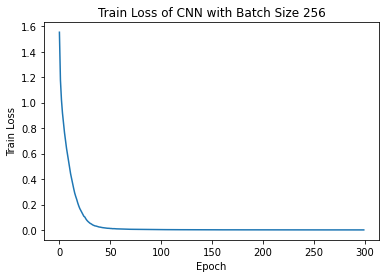

Recall rate of CNN with batch size 256:  0.7236


In [ ]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/batchsize/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of CNN with Batch Size 256')
plt.show()

# Test
cnn_batchnorm = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/batchsize/cnn_epc300_1015_13_09_55.pth')
recall_rate = test_cnn(model=cnn_batchnorm, device=device, dataloader=test_loader)
print('Recall rate of CNN with batch size 256: ', recall_rate)

### 3.2 Learning Rate
##### change learning rate from 0.001 to 0.1

In [25]:
# Initialize CNN
cnn_batchnorm = CNN_batchnorm(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cnn_batchnorm.to(device)

print(f'Selected device: {device}')
summary(cnn_batchnorm, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           4,864
         LeakyReLU-2           [-1, 64, 28, 28]               0
       BatchNorm2d-3           [-1, 64, 28, 28]             128
         MaxPool2d-4           [-1, 64, 14, 14]               0
            Conv2d-5          [-1, 128, 12, 12]          73,856
         LeakyReLU-6          [-1, 128, 12, 12]               0
       BatchNorm2d-7          [-1, 128, 12, 12]             256
         MaxPool2d-8            [-1, 128, 6, 6]               0
            Conv2d-9            [-1, 256, 4, 4]         295,168
        MaxPool2d-10            [-1, 256, 2, 2]               0
          Flatten-11                 [-1, 1024]               0
           Linear-12                  [-1, 512]         524,800
        LeakyReLU-13                  [-1, 512]               0
      BatchNorm1d

In [26]:
# Define the learning rate, batch size, and training epochs
lr= 0.1
batch_size = 64
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(cnn_batchnorm.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
### Training cycle
### Time: 1h 16m 11s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=cnn_batchnorm, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/lr/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(cnn_batchnorm, name)
        np.save('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/lr/train_loss.npy', np.array(loss))

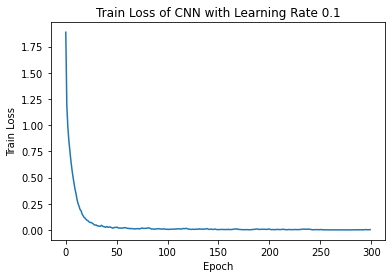

Recall rate of CNN with learning rate 0.1:  0.7391


In [27]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/lr/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of CNN with Learning Rate 0.1')
plt.show()

# Test
cnn_batchnorm = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/lr/cnn_epc300_1015_14_35_01.pth')
recall_rate = test_cnn(model=cnn_batchnorm, device=device, dataloader=test_loader)
print('Recall rate of CNN with learning rate 0.1: ', recall_rate)

### 3.3 Data shuffling
##### shuffling data each epoch

In [28]:
# Initialize CNN
cnn_batchnorm = CNN_batchnorm(encoded_space_dim=10, fc2_input_dim=512)

# Move CNN to the selected device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cnn_batchnorm.to(device)

print(f'Selected device: {device}')
summary(cnn_batchnorm, (3,32,32))

Selected device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           4,864
         LeakyReLU-2           [-1, 64, 28, 28]               0
       BatchNorm2d-3           [-1, 64, 28, 28]             128
         MaxPool2d-4           [-1, 64, 14, 14]               0
            Conv2d-5          [-1, 128, 12, 12]          73,856
         LeakyReLU-6          [-1, 128, 12, 12]               0
       BatchNorm2d-7          [-1, 128, 12, 12]             256
         MaxPool2d-8            [-1, 128, 6, 6]               0
            Conv2d-9            [-1, 256, 4, 4]         295,168
        MaxPool2d-10            [-1, 256, 2, 2]               0
          Flatten-11                 [-1, 1024]               0
           Linear-12                  [-1, 512]         524,800
        LeakyReLU-13                  [-1, 512]               0
      BatchNorm1d

In [29]:
# Define the learning rate, batch size, and training epochs
lr= 0.001
batch_size = 64
num_epochs = 300

# Define an optimizer
optim = torch.optim.SGD(cnn_batchnorm.parameters(), lr=lr, momentum=0.9)

# The dataloaders handle shuffling, batching, etc...
torch.manual_seed(0)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
### Training cycle
### Time: 1h 15m 24s
loss = []

for epoch in range(num_epochs):
    ### Training (use the training function)
    train_loss=train_cnn(model=cnn_batchnorm, 
                               device=device, 
                               dataloader=train_loader, 
                               optimizer=optim)
    loss.append(train_loss)

    # Print loss
    print('EPOCH {}/{} \t train loss {:.6f}'.format(epoch + 1, num_epochs, train_loss))

    # Save models
    if (epoch+1) % 30 == 0:
        prefix = '/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/shuffle/' + 'cnn_epc{}_'.format(epoch+1)
        name = time.strftime(prefix + '%m%d_%H_%M_%S.pth')
        torch.save(cnn_batchnorm, name)
        np.save('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/shuffle/train_loss.npy', np.array(loss))

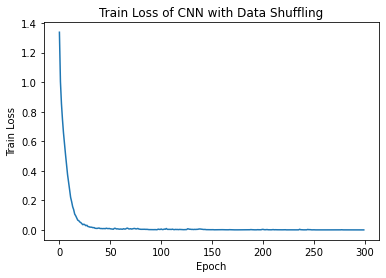

Recall rate of CNN with data shuffling:  0.7479


In [31]:
# Plot train loss
train_loss = np.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/shuffle/train_loss.npy')
plt.figure()
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Train Loss of CNN with Data Shuffling')
plt.show()

# Test
#cnn_batchnorm = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/shuffle/cnn_epc300_1016_11_43_12.pth')
cnn_batchnorm = torch.load('/content/drive/My Drive/EQ2425_Project/Project3/models_pro3/shuffle/cnn_epc270_1016_11_35_37.pth')
recall_rate = test_cnn(model=cnn_batchnorm, device=device, dataloader=test_loader)
print('Recall rate of CNN with data shuffling: ', recall_rate)